In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import theano
import theano.tensor as T
def error_rate(p, t):
    return np.mean(p!=t)

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [3]:
Y = df['left']
subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [4]:
salary_dummies = pd.get_dummies(subdf.salary, prefix = "salary")
subdf.drop(["salary"], axis = 1, inplace = True)

/home/spiringseeker57/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
df1 = pd.concat([subdf, salary_dummies], axis = 1)

In [6]:
df1.drop(["average_montly_hours"], axis = 1, inplace = True)

In [42]:
y = []
for i in Y:
    if i == 1:
        y.append(0)
    else:
        y.append(1)
y = pd.Series(y)

Yr = pd.concat([Y, y], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(df1.values, Yr.values, test_size =0.3)
X_train.shape

(10499, 5)

In [43]:
train_examples, input_size = X_train.shape
hidden_size = 3
output_size = 2
batch_sz = 100
n_batches = train_examples // batch_sz
reg = 0.01
max_iter = 20
print_period = 10
lr = 0.000006

W1_init = np.random.random([input_size, hidden_size])
b1_init = np.zeros(hidden_size)

W2_init = np.random.random([hidden_size, output_size])
b2_init = np.zeros(output_size)

thX = T.matrix("X")
thT = T.matrix("T")
W1 = theano.shared(W1_init, "W1")
W2 = theano.shared(W2_init, "W2")
b1 = theano.shared(b1_init, "b1")
b2 = theano.shared(b2_init, "b2")

thZ = T.nnet.relu(thX.dot(W1) + b1)

thY = T.nnet.softmax(thZ.dot(W2) + b2)

prediction = T.argmax(thY, axis = 1)

cost = -(thT*T.log(thY)).sum() + reg*((W1*W1).sum() + (b1*b1).sum() + (W2*W2).sum() + (b2*b2).sum())

update_W1 = W1 - lr*T.grad(cost, W1)
update_b1 = b1 - lr*T.grad(cost, b1)
update_W2 = W2 - lr*T.grad(cost, W2)
update_b2 = b2 - lr*T.grad(cost, b2)

train = theano.function([thX, thT], updates = [(W1, update_W1), (W2, update_W2), (b1, update_b1), (b2, update_b2)])

get_prediction = theano.function(inputs = [thX, thT], outputs = [cost, prediction])

costs = []





In [44]:
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = X_train[j*batch_sz:(j*batch_sz + batch_sz)]
            Ybatch = Y_train[j*batch_sz:(j*batch_sz + batch_sz)]

            train(Xbatch, Ybatch)
            if j % print_period == 0:
                cost_val, prediction_val = get_prediction(X_test, Y_test)
                err = error_rate(prediction_val, Y_test)
                print("Cost / err at iteration i=%d, j=%d: %.3f / %.3f" % (i, j, cost_val, err))
                costs.append(cost_val)

/home/spiringseeker57/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  


Cost / err at iteration i=0, j=0: 2847.497 / 1.000
Cost / err at iteration i=0, j=10: 2838.253 / 1.000
Cost / err at iteration i=0, j=20: 2829.424 / 1.000
Cost / err at iteration i=0, j=30: 2819.774 / 1.000
Cost / err at iteration i=0, j=40: 2810.651 / 1.000
Cost / err at iteration i=0, j=50: 2802.780 / 1.000
Cost / err at iteration i=0, j=60: 2794.854 / 1.000
Cost / err at iteration i=0, j=70: 2786.714 / 1.000
Cost / err at iteration i=0, j=80: 2779.382 / 1.000
Cost / err at iteration i=0, j=90: 2772.147 / 1.000
Cost / err at iteration i=0, j=100: 2763.334 / 1.000
Cost / err at iteration i=1, j=0: 2760.487 / 1.000
Cost / err at iteration i=1, j=10: 2752.958 / 1.000
Cost / err at iteration i=1, j=20: 2745.797 / 1.000
Cost / err at iteration i=1, j=30: 2737.862 / 1.000
Cost / err at iteration i=1, j=40: 2730.392 / 1.000
Cost / err at iteration i=1, j=50: 2724.028 / 1.000
Cost / err at iteration i=1, j=60: 2717.591 / 1.000
Cost / err at iteration i=1, j=70: 2710.941 / 1.000
Cost / err at

Cost / err at iteration i=14, j=100: 2383.106 / 1.000
Cost / err at iteration i=15, j=0: 2382.923 / 1.000
Cost / err at iteration i=15, j=10: 2382.339 / 1.000
Cost / err at iteration i=15, j=20: 2381.841 / 1.000
Cost / err at iteration i=15, j=30: 2381.062 / 1.000
Cost / err at iteration i=15, j=40: 2380.398 / 1.000
Cost / err at iteration i=15, j=50: 2380.001 / 1.000
Cost / err at iteration i=15, j=60: 2379.547 / 1.000
Cost / err at iteration i=15, j=70: 2378.992 / 1.000
Cost / err at iteration i=15, j=80: 2378.625 / 1.000
Cost / err at iteration i=15, j=90: 2378.248 / 1.000
Cost / err at iteration i=15, j=100: 2377.451 / 1.000
Cost / err at iteration i=16, j=0: 2377.298 / 1.000
Cost / err at iteration i=16, j=10: 2376.798 / 1.000
Cost / err at iteration i=16, j=20: 2376.377 / 1.000
Cost / err at iteration i=16, j=30: 2375.695 / 1.000
Cost / err at iteration i=16, j=40: 2375.118 / 1.000
Cost / err at iteration i=16, j=50: 2374.787 / 1.000
Cost / err at iteration i=16, j=60: 2374.402 /

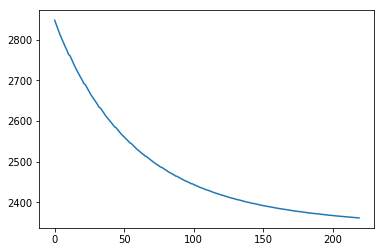

In [47]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.show()